In [10]:
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
with open('train.pkl', 'rb') as f:
    train = pickle.load(f)
with open('test.pkl', 'rb') as f:
    test = pickle.load(f)

In [18]:
X_train = train.drop(labels=['harvest_mean', 'crop_type', 'field_info', 'px_num', 'tile_number', 'valid_px_proportion'], axis=1)
X_test = test.drop(labels=['crop_type', 'field_info', 'px_num', 'tile_number', 'valid_px_proportion'], axis=1)
y_train = train['harvest_mean']
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [20]:
X_train.describe()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_2,ndvi_hist_3,ndvi_hist_4,ndvi_hist_5,ndvi_hist_6,ndvi_hist_7,ndvi_hist_8,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_0,planter_hist_1,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std
count,8428.000000,8428.000000,8428.000000,8428.000000,8428.0,8428.0,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.0,8.428000e+03,8.428000e+03,8.428000e+03,8.428000e+03,8428.000000,8428.000000,8428.000000,8428.000000,8428.000000,8428.0,8428.0,8.428000e+03,8.428000e+03,8428.000000,8.428000e+03,8428.0,8428.0,8428.0,8428.000000,8428.000000
mean,0.201737,0.223006,0.134909,0.033058,0.0,0.0,0.336909,3.643152,3.665135,1.168698,0.418695,0.176905,0.073367,0.013374,0.001098,0.0,1.528203e-09,1.793815e-08,1.272830e-08,1.197588e-07,0.000001,0.000019,0.002647,0.300573,0.065122,0.0,0.0,1.178419e-07,1.112124e-06,0.000098,3.854254e-05,0.0,0.0,0.0,35163.524961,1016.215911
std,0.327069,0.348091,0.318995,0.137589,0.0,0.0,1.219215,2.626022,2.008273,1.202633,0.680569,0.546771,0.464621,0.119394,0.055429,0.0,1.402954e-07,1.154139e-06,5.653272e-07,3.578118e-06,0.000025,0.000685,0.048527,0.079851,0.029766,0.0,0.0,9.882608e-07,4.117463e-06,0.000051,5.089481e-05,0.0,0.0,0.0,1739.158066,802.736520
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.067838,0.010473,0.0,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,25389.802734,0.000000
25%,0.000000,0.000751,0.000000,0.000000,0.0,0.0,0.000009,1.309056,2.286991,0.128659,0.000989,0.000000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.252370,0.042352,0.0,0.0,0.000000e+00,0.000000e+00,0.000057,2.990169e-08,0.0,0.0,0.0,34098.081055,413.127747
50%,0.032704,0.063274,0.000000,0.000000,0.0,0.0,0.000819,3.412400,3.640336,0.893426,0.049338,0.001903,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.291223,0.058830,0.0,0.0,0.000000e+00,8.854246e-08,0.000126,8.820854e-06,0.0,0.0,0.0,35510.103516,784.018127
75%,0.289939,0.294778,0.085984,0.000000,0.0,0.0,0.045870,5.800367,5.087984,1.864596,0.581585,0.056849,0.003571,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.336823,0.083793,0.0,0.0,5.826328e-08,9.028374e-07,0.000136,7.828150e-05,0.0,0.0,0.0,36293.184570,1456.039062
max,3.356656,2.798137,3.317399,2.201266,0.0,0.0,9.500000,9.500000,9.323266,9.274325,7.995107,8.112792,7.618436,5.700000,4.281520,0.0,1.287970e-05,1.015883e-04,3.403822e-05,2.323444e-04,0.001506,0.058814,2.734318,0.786439,0.221210,0.0,0.0,4.665107e-05,1.373312e-04,0.000137,1.373312e-04,0.0,0.0,0.0,39308.273438,7586.876465


In [23]:
thr = 0.1
for i in list(X_train.columns):
  if max(X_train[i]) < thr:
    X_train = X_train.drop([i], axis=1)

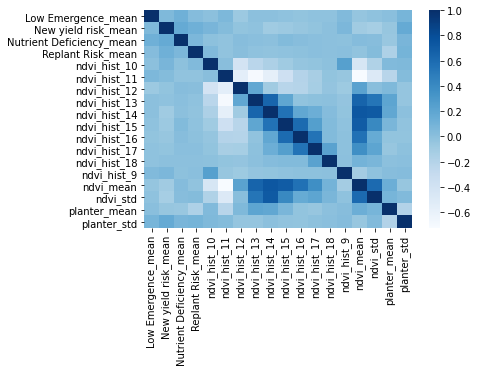

In [24]:
sns.heatmap(X_train.corr(),cmap='Blues',annot=False)

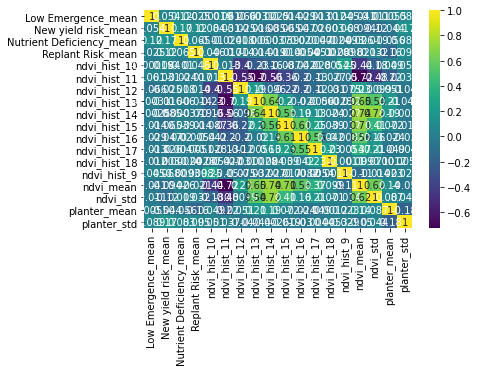

In [25]:
sns.heatmap(X_train.corr(),cmap='viridis',annot=True)

In [26]:
X_train.corr()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_9,ndvi_mean,ndvi_std,planter_mean,planter_std
Low Emergence_mean,1.000000,0.054393,0.121605,0.025377,-0.000194,0.060779,-0.066186,-0.003134,-0.002492,-0.014024,-0.028578,-0.013308,-0.011944,0.045458,-0.040839,-0.011088,0.005462,0.089352
New yield risk_mean,0.054393,1.000000,0.171433,0.119847,0.083753,0.031384,-0.024950,-0.016192,-0.085283,-0.064698,-0.047052,-0.026355,0.003042,0.067693,-0.094451,-0.119299,-0.044161,0.169060
Nutrient Deficiency_mean,0.121605,0.171433,1.000000,0.065087,-0.010104,-0.023726,0.018163,0.005998,0.000372,0.038638,0.020312,0.004688,0.000244,-0.009347,0.025655,0.019157,-0.056091,0.083134
Replant Risk_mean,0.025377,0.119847,0.065087,1.000000,0.045870,-0.017224,0.013801,-0.013649,-0.019073,-0.013590,-0.005410,0.005077,-0.002756,0.009846,-0.021199,0.032366,-0.163484,0.094972
ndvi_hist_10,-0.000194,0.083753,-0.010104,0.045870,1.000000,0.012894,-0.403622,-0.230896,-0.156024,-0.086508,-0.042398,-0.028161,-0.005428,0.247446,-0.439937,-0.178086,0.048556,0.050566
ndvi_hist_11,0.060779,0.031384,-0.023726,-0.017224,0.012894,1.000000,-0.551696,-0.701082,-0.563443,-0.360964,-0.195666,-0.125894,-0.026549,-0.049546,-0.724340,-0.483931,-0.216501,0.036588
ndvi_hist_12,-0.066186,-0.024950,0.018163,0.013801,-0.403622,-0.551696,1.000000,0.189958,-0.096306,-0.215107,-0.199373,-0.122968,-0.031490,-0.074629,0.228078,0.009863,0.051016,-0.039899
ndvi_hist_13,-0.003134,-0.016192,0.005998,-0.013649,-0.230896,-0.701082,0.189958,1.000000,0.644421,0.203736,-0.019986,-0.005592,-0.000275,-0.031854,0.653442,0.540091,0.211749,-0.043917
ndvi_hist_14,-0.002492,-0.085283,0.000372,-0.019073,-0.156024,-0.563443,-0.096306,0.644421,1.000000,0.558943,0.185008,0.134738,0.024125,-0.027008,0.737606,0.718721,0.189600,-0.002640
ndvi_hist_15,-0.014024,-0.064698,0.038638,-0.013590,-0.086508,-0.360964,-0.215107,0.203736,0.558943,1.000000,0.606214,0.252889,0.038556,-0.016752,0.706687,0.412318,0.071523,-0.018937


In [27]:
thr = 0.9

for i in list(X_train.columns):
  for j in list(X_train.columns):
    try:
      if abs(X_train.corr()[i][j]) > 0.9 and i != j:
          X_train = X_train.drop([i], axis=1)
    except:
      pass

In [28]:
X_train.corr()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_9,ndvi_mean,ndvi_std,planter_mean,planter_std
Low Emergence_mean,1.000000,0.054393,0.121605,0.025377,-0.000194,0.060779,-0.066186,-0.003134,-0.002492,-0.014024,-0.028578,-0.013308,-0.011944,0.045458,-0.040839,-0.011088,0.005462,0.089352
New yield risk_mean,0.054393,1.000000,0.171433,0.119847,0.083753,0.031384,-0.024950,-0.016192,-0.085283,-0.064698,-0.047052,-0.026355,0.003042,0.067693,-0.094451,-0.119299,-0.044161,0.169060
Nutrient Deficiency_mean,0.121605,0.171433,1.000000,0.065087,-0.010104,-0.023726,0.018163,0.005998,0.000372,0.038638,0.020312,0.004688,0.000244,-0.009347,0.025655,0.019157,-0.056091,0.083134
Replant Risk_mean,0.025377,0.119847,0.065087,1.000000,0.045870,-0.017224,0.013801,-0.013649,-0.019073,-0.013590,-0.005410,0.005077,-0.002756,0.009846,-0.021199,0.032366,-0.163484,0.094972
ndvi_hist_10,-0.000194,0.083753,-0.010104,0.045870,1.000000,0.012894,-0.403622,-0.230896,-0.156024,-0.086508,-0.042398,-0.028161,-0.005428,0.247446,-0.439937,-0.178086,0.048556,0.050566
ndvi_hist_11,0.060779,0.031384,-0.023726,-0.017224,0.012894,1.000000,-0.551696,-0.701082,-0.563443,-0.360964,-0.195666,-0.125894,-0.026549,-0.049546,-0.724340,-0.483931,-0.216501,0.036588
ndvi_hist_12,-0.066186,-0.024950,0.018163,0.013801,-0.403622,-0.551696,1.000000,0.189958,-0.096306,-0.215107,-0.199373,-0.122968,-0.031490,-0.074629,0.228078,0.009863,0.051016,-0.039899
ndvi_hist_13,-0.003134,-0.016192,0.005998,-0.013649,-0.230896,-0.701082,0.189958,1.000000,0.644421,0.203736,-0.019986,-0.005592,-0.000275,-0.031854,0.653442,0.540091,0.211749,-0.043917
ndvi_hist_14,-0.002492,-0.085283,0.000372,-0.019073,-0.156024,-0.563443,-0.096306,0.644421,1.000000,0.558943,0.185008,0.134738,0.024125,-0.027008,0.737606,0.718721,0.189600,-0.002640
ndvi_hist_15,-0.014024,-0.064698,0.038638,-0.013590,-0.086508,-0.360964,-0.215107,0.203736,0.558943,1.000000,0.606214,0.252889,0.038556,-0.016752,0.706687,0.412318,0.071523,-0.018937


In [29]:
X_train.corr()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,ndvi_hist_13,ndvi_hist_14,ndvi_hist_15,ndvi_hist_16,ndvi_hist_17,ndvi_hist_18,ndvi_hist_9,ndvi_mean,ndvi_std,planter_mean,planter_std
Low Emergence_mean,1.000000,0.054393,0.121605,0.025377,-0.000194,0.060779,-0.066186,-0.003134,-0.002492,-0.014024,-0.028578,-0.013308,-0.011944,0.045458,-0.040839,-0.011088,0.005462,0.089352
New yield risk_mean,0.054393,1.000000,0.171433,0.119847,0.083753,0.031384,-0.024950,-0.016192,-0.085283,-0.064698,-0.047052,-0.026355,0.003042,0.067693,-0.094451,-0.119299,-0.044161,0.169060
Nutrient Deficiency_mean,0.121605,0.171433,1.000000,0.065087,-0.010104,-0.023726,0.018163,0.005998,0.000372,0.038638,0.020312,0.004688,0.000244,-0.009347,0.025655,0.019157,-0.056091,0.083134
Replant Risk_mean,0.025377,0.119847,0.065087,1.000000,0.045870,-0.017224,0.013801,-0.013649,-0.019073,-0.013590,-0.005410,0.005077,-0.002756,0.009846,-0.021199,0.032366,-0.163484,0.094972
ndvi_hist_10,-0.000194,0.083753,-0.010104,0.045870,1.000000,0.012894,-0.403622,-0.230896,-0.156024,-0.086508,-0.042398,-0.028161,-0.005428,0.247446,-0.439937,-0.178086,0.048556,0.050566
ndvi_hist_11,0.060779,0.031384,-0.023726,-0.017224,0.012894,1.000000,-0.551696,-0.701082,-0.563443,-0.360964,-0.195666,-0.125894,-0.026549,-0.049546,-0.724340,-0.483931,-0.216501,0.036588
ndvi_hist_12,-0.066186,-0.024950,0.018163,0.013801,-0.403622,-0.551696,1.000000,0.189958,-0.096306,-0.215107,-0.199373,-0.122968,-0.031490,-0.074629,0.228078,0.009863,0.051016,-0.039899
ndvi_hist_13,-0.003134,-0.016192,0.005998,-0.013649,-0.230896,-0.701082,0.189958,1.000000,0.644421,0.203736,-0.019986,-0.005592,-0.000275,-0.031854,0.653442,0.540091,0.211749,-0.043917
ndvi_hist_14,-0.002492,-0.085283,0.000372,-0.019073,-0.156024,-0.563443,-0.096306,0.644421,1.000000,0.558943,0.185008,0.134738,0.024125,-0.027008,0.737606,0.718721,0.189600,-0.002640
ndvi_hist_15,-0.014024,-0.064698,0.038638,-0.013590,-0.086508,-0.360964,-0.215107,0.203736,0.558943,1.000000,0.606214,0.252889,0.038556,-0.016752,0.706687,0.412318,0.071523,-0.018937


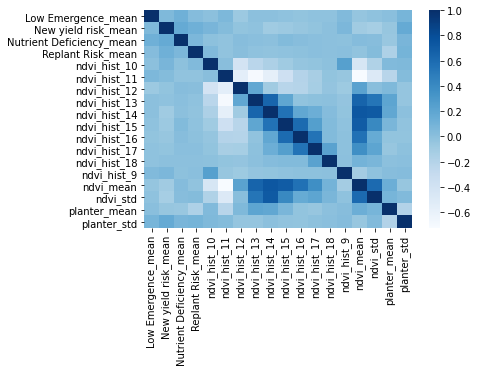

In [30]:
sns.heatmap(X_train.corr(),cmap='Blues',annot=False)

In [31]:
train.corr()['harvest_mean']

Low Emergence_mean         -0.145118
New yield risk_mean        -0.194361
Nutrient Deficiency_mean   -0.318430
Replant Risk_mean          -0.197401
harvest_mean                1.000000
ndvi_hist_0                      NaN
ndvi_hist_1                -0.004346
ndvi_hist_10               -0.010764
ndvi_hist_11               -0.082366
ndvi_hist_12                0.082899
ndvi_hist_13                0.108361
ndvi_hist_14                0.050703
ndvi_hist_15               -0.076025
ndvi_hist_16               -0.094606
ndvi_hist_17               -0.087500
ndvi_hist_18               -0.060506
ndvi_hist_2                -0.004346
ndvi_hist_3                -0.004352
ndvi_hist_4                -0.004348
ndvi_hist_5                -0.004303
ndvi_hist_6                -0.004006
ndvi_hist_7                -0.005257
ndvi_hist_8                -0.001755
ndvi_hist_9                -0.003862
ndvi_mean                   0.007802
ndvi_std                    0.027003
planter_hist_0                   NaN
p

In [32]:
train_feature = train[['harvest_mean', 'Low Emergence_mean', 'New yield risk_mean', 'Nutrient Deficiency_mean', 'Replant Risk_mean', 'ndvi_mean', 'ndvi_std', 'planter_mean', 'planter_std']]

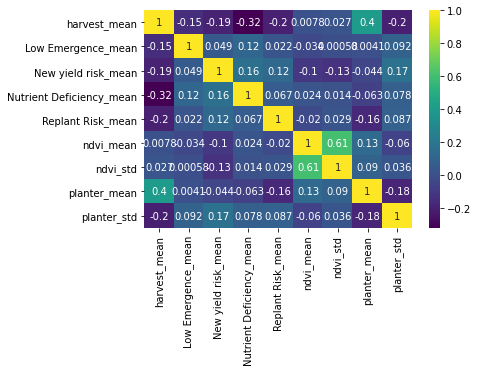

In [34]:
sns.heatmap(train_feature.corr(),cmap='viridis',annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


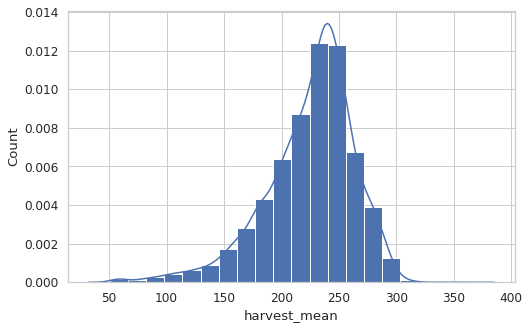

In [35]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    train_feature['harvest_mean'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='harvest_mean', ylabel='Count');

In [36]:
train_feature.describe()

,harvest_mean,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,ndvi_mean,ndvi_std,planter_mean,planter_std
count,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000
mean,224.726271,0.203087,0.220602,0.133807,0.033178,0.300569,0.065114,35162.378046,1013.139056
std,39.268998,0.329492,0.344606,0.318225,0.138439,0.080574,0.029713,1733.244451,801.334766
min,50.441578,0.000000,0.000000,0.000000,0.000000,0.067838,0.010473,25389.802734,0.000000
25%,204.053043,0.000000,0.000316,0.000000,0.000000,0.251965,0.042334,34123.598633,413.369881
50%,231.903946,0.032982,0.061903,0.000000,0.000000,0.290847,0.058916,35504.556641,775.940338
75%,250.606483,0.292389,0.292154,0.085702,0.000000,0.337043,0.083900,36290.360352,1449.397980
max,366.780670,3.356656,2.798137,3.317399,2.489798,0.786439,0.221210,39308.273438,7586.876465


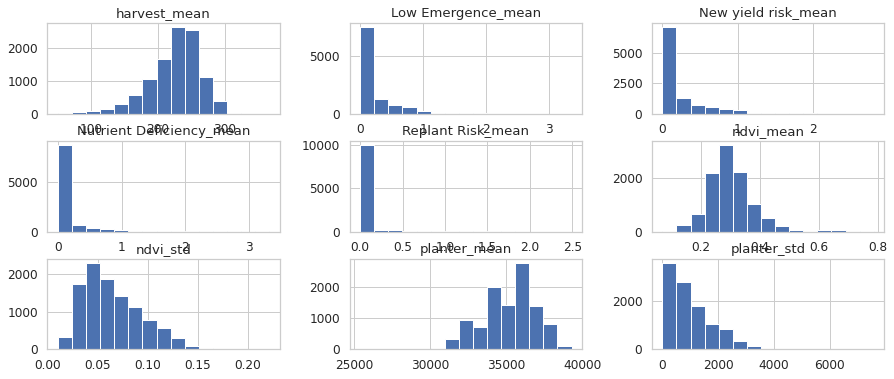

In [37]:
train_feature[list(train_feature.columns)].hist(bins=15, figsize=(15, 6), layout=(3, 3));

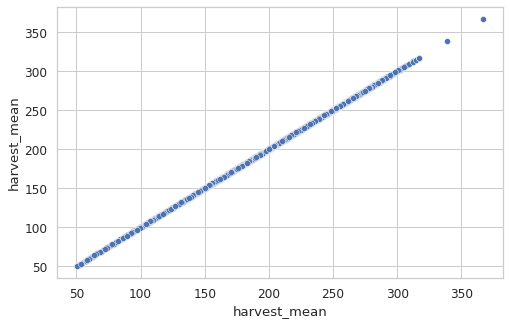

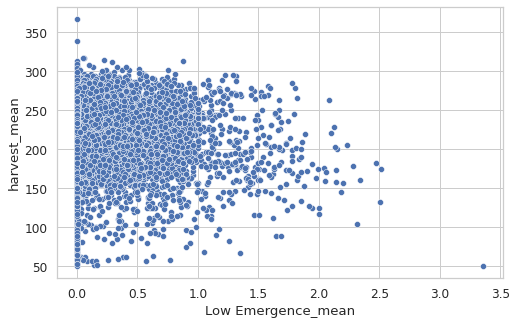

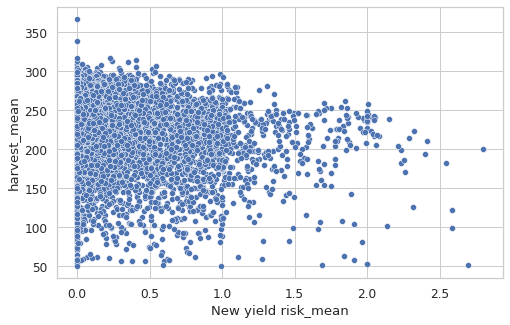

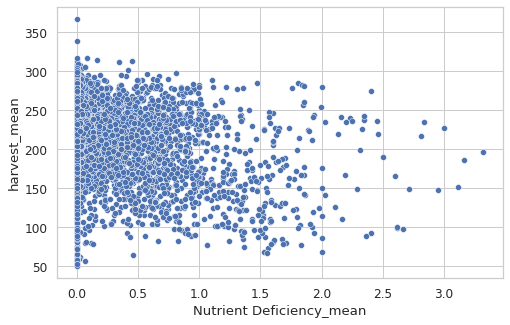

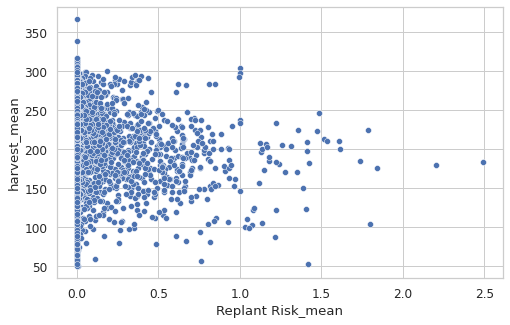

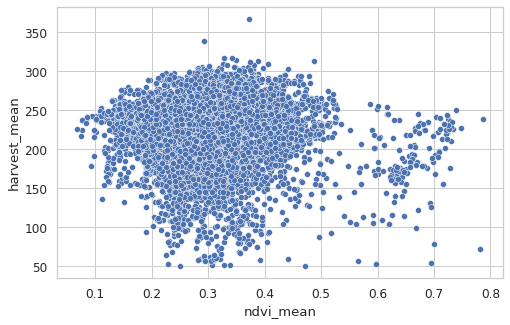

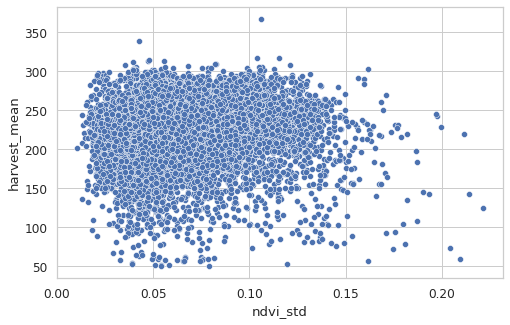

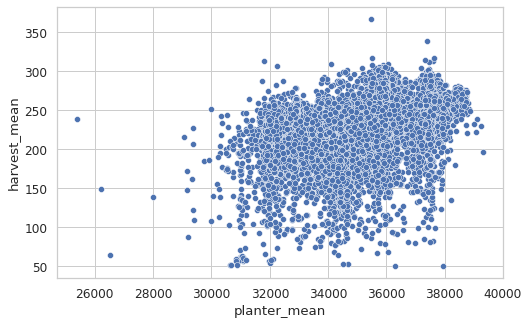

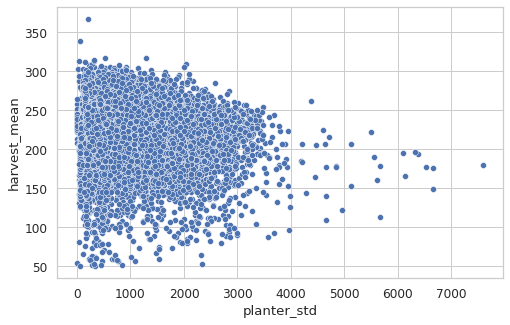

In [38]:
for fr in list(train_feature.columns):
  plt.figure()
  sns.scatterplot(y=train_feature['harvest_mean'], x=train_feature[fr])
  plt.show()

In [42]:
Q1 = train_feature.quantile(0.25)
Q3 = train_feature.quantile(0.75)
IQR = Q3 - Q1

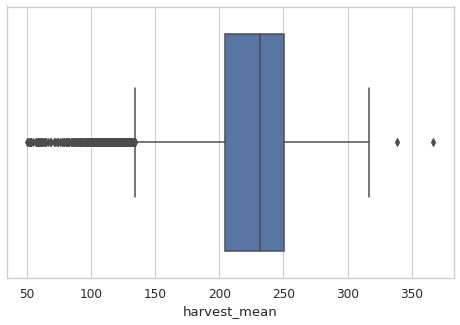

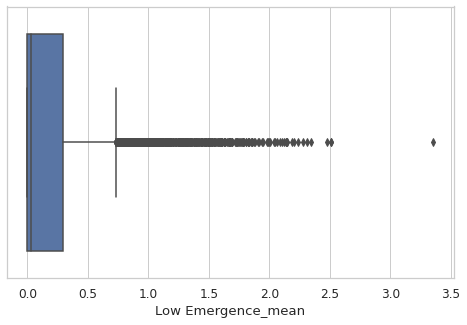

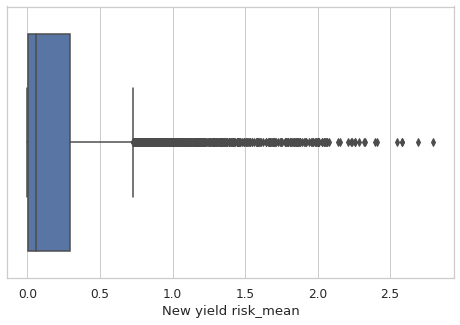

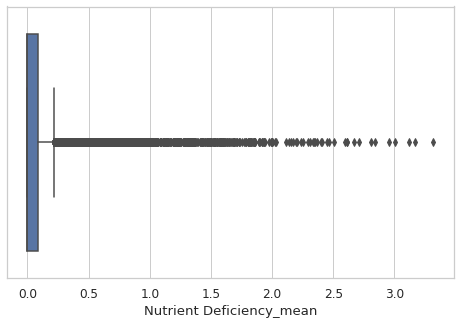

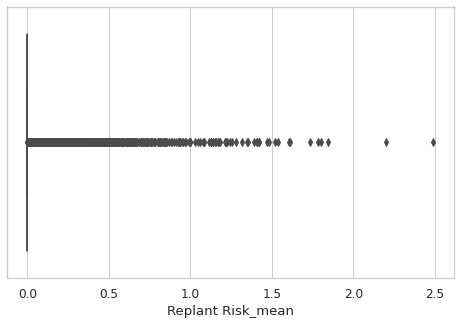

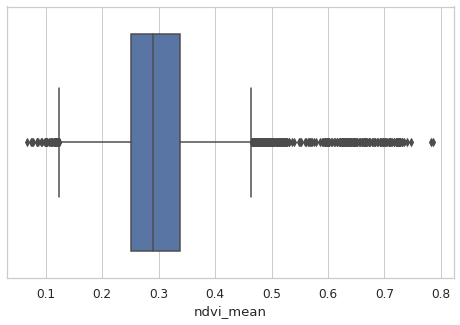

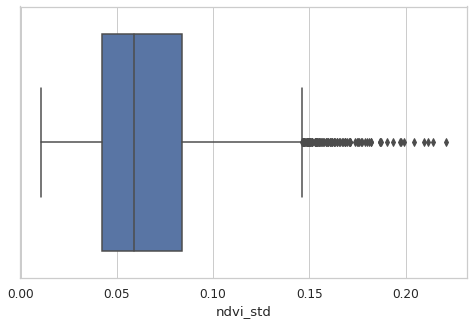

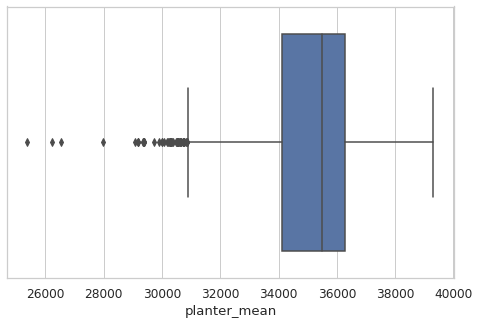

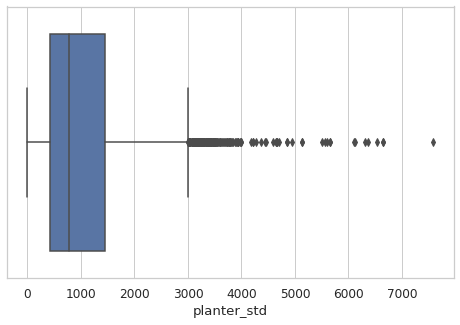

In [39]:
for i in list(train_feature.columns):
  plt.figure()
  sns.boxplot(x=train_feature[i])
  plt.show()

In [43]:
for i in list(train_feature.columns):
  out_count = 0
  for j in list(train_feature[i]):
    if ((j < (Q1[i] - 1.5 * IQR[i])) or (j > (Q3[i] + 1.5 * IQR[i]))):
      out_count += 1
  print(f"The number of outliers for column {i} is {out_count}")

The number of outliers for column harvest_mean is 317
The number of outliers for column Low Emergence_mean is 850
The number of outliers for column New yield risk_mean is 1009
The number of outliers for column Nutrient Deficiency_mean is 1807
The number of outliers for column Replant Risk_mean is 1935
The number of outliers for column ndvi_mean is 377
The number of outliers for column ndvi_std is 99
The number of outliers for column planter_mean is 54
The number of outliers for column planter_std is 199


In [44]:
test_feature = test[['Low Emergence_mean', 'New yield risk_mean', 'Nutrient Deficiency_mean', 'Replant Risk_mean', 'ndvi_mean', 'ndvi_std', 'planter_mean', 'planter_std']]

In [45]:
for i in list(test_feature.columns):
  out_count = 0
  for j in list(test_feature[i]):
    if ((j < (Q1[i] - 1.5 * IQR[i])) or (j > (Q3[i] + 1.5 * IQR[i]))):
      out_count += 1
  print(f"The number of outliers for column {i} is {out_count}")

The number of outliers for column Low Emergence_mean is 363
The number of outliers for column New yield risk_mean is 360
The number of outliers for column Nutrient Deficiency_mean is 630
The number of outliers for column Replant Risk_mean is 948
The number of outliers for column ndvi_mean is 384
The number of outliers for column ndvi_std is 37
The number of outliers for column planter_mean is 41
The number of outliers for column planter_std is 36


In [46]:
test.shape

(3513, 41)

# Summary

In summary, most of the histogram features didn't really matter in the end. Some were just full of zeros (or extremely small values) and some were just linearly dependent on each other. The others weren't such good features either.
Moving on to the other features, we can firstly see that no feature has an obvious, large correlation with the harvest mean. The ndvi_mean and ndvi_std features have close to zero correlations with the harvest_mean. The planter features have good correlations, as well as most of the alerts. The replant risk_mean feature seems like a bad feature, as most points have 0 as a value for it and it has a huge number of outliers. Turning it to a categorical feature *might* change something though.